In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
import time

In [10]:
url = 'https://www.moneycontrol.com/stocks/marketstats/nse-mostactive-stocks/nifty-500-7/'
page= requests.get(url)
soup=BeautifulSoup(page.text,'html')


<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Low Price High Volume Stocks/Shares, Low Price High Volume Shares/Stocks, High Volume Low Price Stocks/Shares</title>
<meta content="Find all Low Price High Volume Stocks, Low Price High Volume Shares, High Volume Low Price Stocks" name="description"/>
<meta content="Low Price High Volume Stocks, Low Price High Volume Shares, High Volume Low Price Stocks" name="keywords"/>
<!-- common_includefiles_v2.php - Revamp MCI  -->
<script src="https://stat2.moneycontrol.com/mcjs/common/https_mc_common.js" type="text/javascript"></script>
<script src="https://stat2.moneycontrol.com/mcjs/common/rhs_widgets.js?v=0.3" type="text/javascript"></script>
<link href="https://stat2.moneycontrol.com/mccss/common/newrhs_widget.css?v=0.5" rel="stylesheet" type="text/css"/>
<link href="https://stat2.moneycontrol.com/mccss/marketstats/https_stages_style.css" rel="stylesheet" type="text/css"/>
<script lang
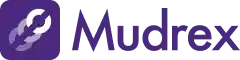
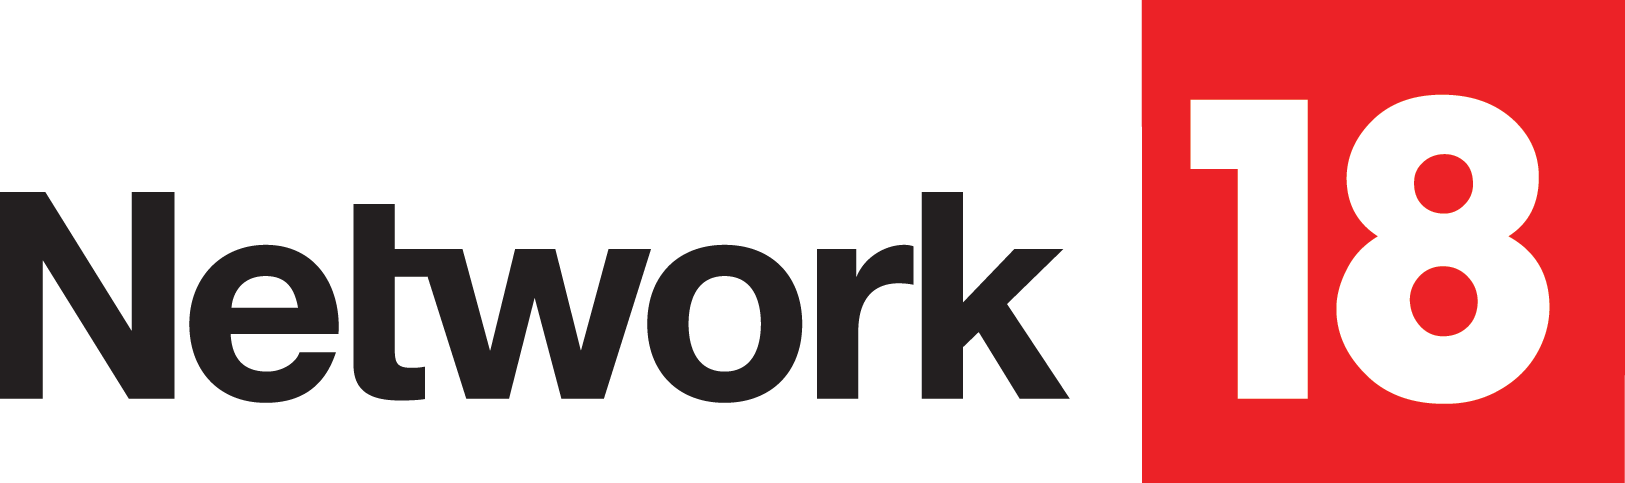

In [12]:
print(soup)

In [14]:
 target_div = soup.find('div', class_='bsr_table hist_tbl_hm')

In [15]:
print(target_div)

<div class="bsr_table hist_tbl_hm">
<table border="0" cellpadding="0" cellspacing="0" width="100%">
<thead>
<tr>
<th align="left" class="TAL" width="300"><a href="/stocks/marketstats/mostactive.php?optex=NSE&amp;opttopic=mostactive&amp;sort=name&amp;index=7&amp;order=" style="color:#fff">Company Name</a></th>
<th width="175">High</th>
<th width="180">Low</th>
<th width="185">Last Price</th>
<th width="175">% Chg</th>
<th width="175"><a href="/stocks/marketstats/mostactive.php?optex=NSE&amp;opttopic=mostactive&amp;index=7&amp;sort=val&amp;order=1" style="color:#fff"><b>Value</b></a> <font face="arial" size="1">(Rs. cr.)</font></th>
<th class="PR" width="300"><span id="th_name">5 Day Performance</span>
<div class="dropdownchng"> <span class="bluarw MT10 MR2"></span>
<ul>
<li><a href="javascript:;" onclick="display('performance');">5 Day Performance</a></li>
<li><a href="javascript:;" onclick="display('vol');">Volume</a></li>
<li><a href="javascript:;" onclick="display('lc');">Lower Circu

In [16]:
header=target_div.find_all('th')

In [17]:
print(header)

[<th align="left" class="TAL" width="300"><a href="/stocks/marketstats/mostactive.php?optex=NSE&amp;opttopic=mostactive&amp;sort=name&amp;index=7&amp;order=" style="color:#fff">Company Name</a></th>, <th width="175">High</th>, <th width="180">Low</th>, <th width="185">Last Price</th>, <th width="175">% Chg</th>, <th width="175"><a href="/stocks/marketstats/mostactive.php?optex=NSE&amp;opttopic=mostactive&amp;index=7&amp;sort=val&amp;order=1" style="color:#fff"><b>Value</b></a> <font face="arial" size="1">(Rs. cr.)</font></th>, <th class="PR" width="300"><span id="th_name">5 Day Performance</span>
<div class="dropdownchng"> <span class="bluarw MT10 MR2"></span>
<ul>
<li><a href="javascript:;" onclick="display('performance');">5 Day Performance</a></li>
<li><a href="javascript:;" onclick="display('vol');">Volume</a></li>
<li><a href="javascript:;" onclick="display('lc');">Lower Circuit</a></li>
<li><a href="javascript:;" onclick="display('uc');">Upper Circuit</a></li>
<li><a href="javasc

In [18]:
header2=[title.text.strip() for title in header]
print(header2)

['Company Name', 'High', 'Low', 'Last Price', '% Chg', 'Value (Rs. cr.)', '5 Day Performance\n \n\n5 Day Performance\nVolume\nLower Circuit\nUpper Circuit\nVWAP\nSMA  \n\n\n\n30 DMA\n\n\n50 DMA\n\n\n150 DMA\n\n\n200 DMA\n\n\n\nDeliverables\nP/E\nP/B']


In [19]:
df=pd.DataFrame(columns=header2)
df

Empty DataFrame
Columns: [Company Name, High, Low, Last Price, % Chg, Value (Rs. cr.), 5 Day Performance
 

5 Day Performance
Volume
Lower Circuit
Upper Circuit
VWAP
SMA  



30 DMA


50 DMA


150 DMA


200 DMA



Deliverables
P/E
P/B]
Index: []

In [20]:
df.rename(columns={'5 Day Performance\n \n\n5 Day Performance\nVolume\nLower Circuit\nUpper Circuit\nVWAP\nSMA  \n\n\n\n30 DMA\n\n\n50 DMA\n\n\n150 DMA\n\n\n200 DMA\n\n\n\nDeliverables\nP/E\nP/B': '5 Day Performance'}, inplace=True)

In [21]:
df.columns

Index(['Company Name', 'High', 'Low', 'Last Price', '% Chg', 'Value (Rs. cr.)',
       '5 Day Performance'],
      dtype='object')

In [22]:
df

Empty DataFrame
Columns: [Company Name, High, Low, Last Price, % Chg, Value (Rs. cr.), 5 Day Performance]
Index: []

In [23]:
Column_data=target_div.find_all('tr')

In [25]:
for row in Column_data[1::7]:
    row_data=row.find_all('td')
    individual_row_data=[tit.text for tit in row_data]
    a= [data.split('\n') for data in individual_row_data]
    print(a)

[['Zomato', '', '', 'Add to', ' Watchlist | Portfolio ', ' ', '', ' ', '', '', 'ACTIONS', '', 'Zomato Block Deal on NSE||Qty: 75,452||Deal Price: 259.89||Value (cr): 1.96||Time: 09:16amZomato Block Deal on NSE||Qty: 66,451||Deal Price: 246.75||Value (cr): 1.64||Time: 09:16am', '', '', '', ''], ['265.55'], ['249.00'], ['256.29'], ['-2.31'], ['4,000.85'], ['', '', '', '', 'AVERAGE VOLUME', '', '', '5-Day', '116396444.20', '', '', '10-Day', '5067690.90', '', '', '30-Day', '53359192.77', '', '', '', '', '156106218'], ['5-Day'], ['116396444.20'], ['10-Day'], ['5067690.90'], ['30-Day'], ['53359192.77'], ['217.88'], ['204.43'], ['177.47'], ['162.54'], ['144.8'], ['9.93'], [' ', '', '30-Jul-24', '227.13  0.24 (0.11%)', '', ' ', '', '31-Jul-24', '229.45  2.32 (1.02%)', '', ' ', '', '01-Aug-24', '234.09  4.64 (2.02%)', '', ' ', '', '02-Aug-24', '262.34  28.25 (12.07%)', '', ' ', '', '05-Aug-24', '256.29  -6.05 (-2.31%)', '', ''], ['', '', '', '', 'DELIVERY AVERAGES', '', '', '3-Day', '%', '', ''

In [26]:
#raw data for Company name 
for row in Column_data[1::7]:
    row_data=row.find_all('td')
    individual_row_data=[tit.text for tit in row_data]
    a= [data.split('\n') for data in individual_row_data][0]
    Company_name=a[0]
    print(Company_name)

Zomato
HDFC Bank
Tata Motors
Tata Motors
Reliance
SBI
Infosys
NTPC
ICICI Bank
Hindustan Aeron
Hindustan Aeron
PCBL
Tata Steel
Tata Steel
MOTHERSON
IRFC
Bharat Elec
Suzlon Energy
Maruti Suzuki
Axis Bank
Adani Wilmar
Tata Power
Rail Vikas
Power Finance
ONGC
ITC
TCS
REC
Adani Ports
Adani Power
Larsen
M&M
Mazagon Dock
Vodafone Idea
Yes Bank
Sun Pharma
Kotak Mahindra
Vedanta
LIC Housing Fin
HUL
Hindalco
BPCL
Bank of Baroda
Adani Energy
BHEL
Bharti Airtel
Marico
Divis Labs
Dixon Technolog
Delhivery
Adani Enterpris
SAIL
CDSL
HDFC Life
Titan Company
LIC India
IOC
Britannia
IEX
Asian Paints
Bajaj Finance
Apollo Hospital
Canara Bank
Canara Bank
INDUS TOWERS
Coal India
HFCL
PNB
Trent
NHPC
Godrej Prop
Shriram Finance
HINDPETRO
Wipro
Jio Financial
HCL Tech
Birlasoft
Cummins
IndusInd Bank
DLF
One 97 Paytm
Power Grid Corp
HUDCO
NBCC (India)
UltraTechCement
TATA Cons. Prod
Eicher Motors
UPL
GAIL
NCC
Bharat Forge
TVS Motor
COFORGE LTD.
Oil India
Ashok Leyland
LTIMindtree
Ircon Internati
Ircon Internati

In [36]:
import pandas as pd

company_names = []

for row in Column_data[1::7]:
    row_data = row.find_all('td')
    individual_row_data = [tit.text.strip() for tit in row_data]
    a = [data.split('\n') for data in individual_row_data][0]
    Company_name = a[0]
    company_names.append(Company_name)

# Join the company names with a comma separator
comma_separated_names = ', '.join(company_names)
print(comma_separated_names)

# Convert the list of company names to a DataFrame
df ['Company Name']= pd.DataFrame(company_names, columns=['Company Name'])
print(df['Company Name'])


Zomato, HDFC Bank, Tata Motors, Tata Motors, Reliance, SBI, Infosys, NTPC, ICICI Bank, Hindustan Aeron, Hindustan Aeron, PCBL, Tata Steel, Tata Steel, MOTHERSON, IRFC, Bharat Elec, Suzlon Energy, Maruti Suzuki, Axis Bank, Adani Wilmar, Tata Power, Rail Vikas, Power Finance, ONGC, ITC, TCS, REC, Adani Ports, Adani Power, Larsen, M&M, Mazagon Dock, Vodafone Idea, Yes Bank, Sun Pharma, Kotak Mahindra, Vedanta, LIC Housing Fin, HUL, Hindalco, BPCL, Bank of Baroda, Adani Energy, BHEL, Bharti Airtel, Marico, Divis Labs, Dixon Technolog, Delhivery, Adani Enterpris, SAIL, CDSL, HDFC Life, Titan Company, LIC India, IOC, Britannia, IEX, Asian Paints, Bajaj Finance, Apollo Hospital, Canara Bank, Canara Bank, INDUS TOWERS, Coal India, HFCL, PNB, Trent, NHPC, Godrej Prop, Shriram Finance, HINDPETRO, Wipro, Jio Financial, HCL Tech, Birlasoft, Cummins, IndusInd Bank, DLF, One 97 Paytm, Power Grid Corp, HUDCO, NBCC (India), UltraTechCement, TATA Cons. Prod, Eicher Motors, UPL, GAIL, NCC, Bharat Forge,

In [28]:
#raw data for [ 'High', 'Low', 'Last Price', '% Chg', 'Value (Rs. cr.)']

for row in Column_data[1::7]:
    row_data=row.find_all('td')
    columns_data_6=[tit.text for tit in row_data][1:6]
    print(columns_data_6)


['265.55', '249.00', '256.29', '-2.31', '4,000.85']
['1,646.00', '1,601.00', '1,615.75', '-2.62', '3,339.24']
['1,065.00', '1,014.05', '1,016.45', '-7.31', '2,708.96']
['1,065.00', '1,014.05', '1,016.45', '-7.31', '2,708.96']
['2,967.80', '2,866.50', '2,894.65', '-3.47', '2,467.21']
['831.35', '800.00', '811.65', '-4.27', '2,246.40']
['1,797.50', '1,718.55', '1,751.90', '-3.81', '1,880.96']
['415.65', '404.65', '413.25', '-1.54', '1,755.88']
['1,188.90', '1,167.00', '1,172.60', '-2.00', '1,677.61']
['4,663.80', '4,480.10', '4,591.10', '-2.23', '1,663.19']
['4,663.80', '4,480.10', '4,591.10', '-2.23', '1,663.19']
['396.90', '355.00', '384.35', '1.98', '1,642.81']
['154.00', '149.00', '149.82', '-5.31', '1,541.41']
['154.00', '149.00', '149.82', '-5.31', '1,541.41']
['188.00', '170.31', '175.51', '-9.18', '1,539.67']
['185.60', '178.00', '179.38', '-6.73', '1,523.13']
['297.45', '285.00', '290.25', '-6.72', '1,462.59']
['71.64', '67.78', '67.85', '-4.91', '1,424.20']
['12,490.00', '12,02

In [29]:
data = []  

for row in Column_data[1::7]:
    row_data = row.find_all('td')
    columns_data_6 = [tit.text for tit in row_data][1:6]
    print(columns_data_6)
    data.append(columns_data_6)  # Append the row data to the list

comma_separated_names = ', '.join([item[0] for item in data])
print(comma_separated_names)

df = pd.DataFrame(data, columns=[ 'High', 'Low', 'Last Price', '% Chg', 'Value (Rs. cr.)'])
print(df)


['265.55', '249.00', '256.29', '-2.31', '4,000.85']
['1,646.00', '1,601.00', '1,615.75', '-2.62', '3,339.24']
['1,065.00', '1,014.05', '1,016.45', '-7.31', '2,708.96']
['1,065.00', '1,014.05', '1,016.45', '-7.31', '2,708.96']
['2,967.80', '2,866.50', '2,894.65', '-3.47', '2,467.21']
['831.35', '800.00', '811.65', '-4.27', '2,246.40']
['1,797.50', '1,718.55', '1,751.90', '-3.81', '1,880.96']
['415.65', '404.65', '413.25', '-1.54', '1,755.88']
['1,188.90', '1,167.00', '1,172.60', '-2.00', '1,677.61']
['4,663.80', '4,480.10', '4,591.10', '-2.23', '1,663.19']
['4,663.80', '4,480.10', '4,591.10', '-2.23', '1,663.19']
['396.90', '355.00', '384.35', '1.98', '1,642.81']
['154.00', '149.00', '149.82', '-5.31', '1,541.41']
['154.00', '149.00', '149.82', '-5.31', '1,541.41']
['188.00', '170.31', '175.51', '-9.18', '1,539.67']
['185.60', '178.00', '179.38', '-6.73', '1,523.13']
['297.45', '285.00', '290.25', '-6.72', '1,462.59']
['71.64', '67.78', '67.85', '-4.91', '1,424.20']
['12,490.00', '12,02

In [30]:
#5day  
#raw data for Company name 
Fivedays = []
for row in Column_data[1::7]:
    row_data=row.find_all('td')
    individual_row_data=[tit.text for tit in row_data]
    a= [data.split('\n') for data in individual_row_data][8]
    Five_days=a[0]
    print(Five_days)
    Fivedays.append(Five_days)

# Convert the list of "5 day Performance" data to a DataFrame
df['5 day Performances'] = pd.DataFrame(Fivedays, columns=['5 day Performances'])
print(df['5 day Performances'])

116396444.20
21375187.80
17529462.20
17529462.20
4685657.40
15228927.20
5447471.40
28992621.80
18837721.60
2359980.80
2359980.80
25236850.20
63623645.00
63623645.00
11396488.00
54366737.80
34501990.80
121967377.60
1024989.20
15361527.80
11837457.40
21552844.00
21539400.00
9933462.00
25378348.20
14079321.80
2177665.20
13156663.60
3765085.20
7938412.80
2670946.40
3386180.80
2252751.80
386452456.40
314804865.60
2911751.40
5310158.80
21822286.80
2577143.00
1578751.80
7369449.80
23065038.40
24410399.80
11660173.40
21939500.00
4470918.20
1746818.40
830578.20
863482.20
5488365.80
2921723.80
26025956.60
1689319.20
4855997.00
1387872.40
3830989.60
40948051.20
260847.20
24194663.60
1914480.40
855875.60
386839.80
27865849.40
27865849.40
12539476.60
15635776.60
62037630.80
55566902.40
864725.60
29717493.20
1791662.20
1786441.00
17657623.60
5699856.80
10831576.80
1777278.60
5730575.40
1303178.60
3876525.00
5285105.40
7432700.00
23240683.00
9793711.00
25658000.60
356124.40
1841386.00
872884.00
34388

In [31]:
#10 day
#raw data for Company name 
Tendays = []
for row in Column_data[1::7]:
    row_data=row.find_all('td')
    individual_row_data=[tit.text for tit in row_data]
    a= [data.split('\n') for data in individual_row_data][10]
    Ten_days=a[0]
    print(Ten_days)
    Tendays.append(Ten_days)

# Convert the list of "10 day Performance" data to a DataFrame
df['10 day Performances'] = pd.DataFrame(Tendays, columns=['10 day Performances'])
print(df['10 day Performances'])

5067690.90
932175.10
941854.10
941854.10
242697.30
873581.30
260645.40
1350556.60
847889.90
191107.70
191107.70
580576.40
3263912.10
3263912.10
463362.80
7063344.70
2879952.50
15374188.20
27854.90
502806.90
500900.70
1425417.00
2386402.60
493813.80
1539924.80
1035759.20
126991.80
575087.30
175888.80
699885.10
207761.00
134592.30
199747.50
47290039.70
23036450.30
115532.80
306858.60
1199149.00
99803.50
117598.20
192306.50
1125184.40
990601.90
408385.10
1981865.40
186301.20
126751.70
14154.70
33286.70
192346.70
90800.50
1832254.40

220674.70
114815.40
310062.50
2371629.90
7984.50
986894.60
70639.80
60226.20
25157.20
2030281.20
2030281.20
649249.90
537959.20
3604637.40
1420830.50
32359.00
3418334.70
27870.00
63595.50
746459.40
612451.90
1547074.10
132370.40
233228.00
21844.30
293693.80
169561.80
384244.20
644004.60
2308264.90
2273819.30
15391.70
69656.20
15130.80
110196.10
1388459.20
715540.90
69983.00
54950.20
15144.00
583701.10
1285129.00
13098.10
1731116.00
1731116.00
2214561.60
28817.

In [38]:
df.to_csv('stock_details1.csv')

In [37]:
df

High       Low Last Price  % Chg Value (Rs. cr.) 5 day Performances  \
0      265.55    249.00     256.29  -2.31        4,000.85       116396444.20   
1    1,646.00  1,601.00   1,615.75  -2.62        3,339.24        21375187.80   
2    1,065.00  1,014.05   1,016.45  -7.31        2,708.96        17529462.20   
3    1,065.00  1,014.05   1,016.45  -7.31        2,708.96        17529462.20   
4    2,967.80  2,866.50   2,894.65  -3.47        2,467.21         4685657.40   
..        ...       ...        ...    ...             ...                ...   
513    212.86    206.55     208.46  -2.60            6.34          705297.00   
514    212.86    206.55     208.46  -2.60            6.34          705297.00   
515    900.00    866.10     874.80  -3.99            5.20          155471.20   
516    814.55    785.50     790.85  -2.41            3.37           98835.20   
517    160.51    155.43     156.16  -4.76            3.10          288399.20   

    10 day Performances    Company Name  
0            5067690.90          Zomato  
1             932175.10       HDFC Bank  
2             941854.10     Tata Motors  
3             941854.10     Tata Motors  
4             242697.30        Reliance  
..                  ...             ...  
513            40504.70    Capri Global  
514            40504.70    Capri Global  
515             5581.00  Jai Balaji Ind  
516            65823.70   Westlife Food  
517            19745.70   Prism Johnson  

[518 rows x 8 columns]

In [183]:
df1 = pd.read_csv('C:/Users/spriy/Downloads/stock_details1.csv')
print(df1)


         High       Low Last Price  % Chg Value (Rs. cr.)  5 day Performances  \
0      265.55       249     256.29  -2.31        4,000.85         116396444.2   
1    1,646.00  1,601.00   1,615.75  -2.62        3,339.24          21375187.8   
2    1,065.00  1,014.05   1,016.45  -7.31        2,708.96          17529462.2   
3    1,065.00  1,014.05   1,016.45  -7.31        2,708.96          17529462.2   
4    2,967.80  2,866.50   2,894.65  -3.47        2,467.21           4685657.4   
..        ...       ...        ...    ...             ...                 ...   
513    212.86    206.55     208.46  -2.60            6.34            705297.0   
514    212.86    206.55     208.46  -2.60            6.34            705297.0   
515       900     866.1      874.8  -3.99             5.2            155471.2   
516    814.55     785.5     790.85  -2.41            3.37             98835.2   
517    160.51    155.43     156.16  -4.76             3.1            288399.2   

     10 day Performances   

In [184]:
df1.dtypes

High                    object
Low                     object
Last Price              object
% Chg                  float64
Value (Rs. cr.)         object
5 day Performances     float64
10 day Performances    float64
Company Name            object
dtype: object

In [185]:
df1.describe()

% Chg  5 day Performances  10 day Performances
count  518.000000        5.180000e+02         5.140000e+02
mean    -3.730598        6.463321e+06         5.185744e+05
std      2.127128        2.447505e+07         2.517167e+06
min    -10.630000        6.252000e+03         1.631000e+02
25%     -5.210000        3.281515e+05         1.561460e+04
50%     -3.900000        1.085157e+06         5.867075e+04
75%     -2.242500        4.172585e+06         2.444206e+05
max      5.590000        3.864525e+08         4.729004e+07

In [186]:
df1.value_counts

<bound method DataFrame.value_counts of          High       Low Last Price  % Chg Value (Rs. cr.)  5 day Performances  \
0      265.55       249     256.29  -2.31        4,000.85         116396444.2   
1    1,646.00  1,601.00   1,615.75  -2.62        3,339.24          21375187.8   
2    1,065.00  1,014.05   1,016.45  -7.31        2,708.96          17529462.2   
3    1,065.00  1,014.05   1,016.45  -7.31        2,708.96          17529462.2   
4    2,967.80  2,866.50   2,894.65  -3.47        2,467.21           4685657.4   
..        ...       ...        ...    ...             ...                 ...   
513    212.86    206.55     208.46  -2.60            6.34            705297.0   
514    212.86    206.55     208.46  -2.60            6.34            705297.0   
515       900     866.1      874.8  -3.99             5.2            155471.2   
516    814.55     785.5     790.85  -2.41            3.37             98835.2   
517    160.51    155.43     156.16  -4.76             3.1            

In [190]:
for i in range(len(df1)):
    df1.loc[i, 'High'] = df1.loc[i, 'High'].replace(',', '')
df1['High'] = pd.to_numeric(df1['High'])

AttributeError: 'numpy.float64' object has no attribute 'replace'

In [189]:
for i in range(len(df1)):
    df1.loc[i, 'Value (Rs. cr.)'] = df1.loc[i, 'Value (Rs. cr.)'].replace(',', '')
df1['Value (Rs. cr.)'] = pd.to_numeric(df1['Value (Rs. cr.)'])


AttributeError: 'numpy.float64' object has no attribute 'replace'

In [191]:
for i in range(len(df1)):
    df1.loc[i, 'Last Price'] = df1.loc[i, 'Last Price'].replace(',', '')
df1['Last Price'] = pd.to_numeric(df1['Last Price'])

In [192]:
for i in range(len(df1)):
    df1.loc[i, 'Low'] = df1.loc[i, 'Low'].replace(',', '')
df1['Low'] = pd.to_numeric(df1['Low'])

In [193]:
df1

High      Low  Last Price  % Chg  Value (Rs. cr.)  5 day Performances  \
0     265.55   249.00      256.29  -2.31          4000.85         116396444.2   
1    1646.00  1601.00     1615.75  -2.62          3339.24          21375187.8   
2    1065.00  1014.05     1016.45  -7.31          2708.96          17529462.2   
3    1065.00  1014.05     1016.45  -7.31          2708.96          17529462.2   
4    2967.80  2866.50     2894.65  -3.47          2467.21           4685657.4   
..       ...      ...         ...    ...              ...                 ...   
513   212.86   206.55      208.46  -2.60             6.34            705297.0   
514   212.86   206.55      208.46  -2.60             6.34            705297.0   
515   900.00   866.10      874.80  -3.99             5.20            155471.2   
516   814.55   785.50      790.85  -2.41             3.37             98835.2   
517   160.51   155.43      156.16  -4.76             3.10            288399.2   

     10 day Performances    Company Name  
0              5067690.9          Zomato  
1               932175.1       HDFC Bank  
2               941854.1     Tata Motors  
3               941854.1     Tata Motors  
4               242697.3        Reliance  
..                   ...             ...  
513              40504.7    Capri Global  
514              40504.7    Capri Global  
515               5581.0  Jai Balaji Ind  
516              65823.7   Westlife Food  
517              19745.7   Prism Johnson  

[518 rows x 8 columns]

In [194]:
df1.dtypes

High                   float64
Low                    float64
Last Price             float64
% Chg                  float64
Value (Rs. cr.)        float64
5 day Performances     float64
10 day Performances    float64
Company Name            object
dtype: object

In [195]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High                 518 non-null    float64
 1   Low                  518 non-null    float64
 2   Last Price           518 non-null    float64
 3   % Chg                518 non-null    float64
 4   Value (Rs. cr.)      518 non-null    float64
 5   5 day Performances   518 non-null    float64
 6   10 day Performances  514 non-null    float64
 7   Company Name         518 non-null    object 
dtypes: float64(7), object(1)
memory usage: 32.5+ KB


In [196]:
df2=df1.drop_duplicates(keep='last')
df2

High      Low  Last Price  % Chg  Value (Rs. cr.)  5 day Performances  \
0     265.55   249.00      256.29  -2.31          4000.85         116396444.2   
1    1646.00  1601.00     1615.75  -2.62          3339.24          21375187.8   
3    1065.00  1014.05     1016.45  -7.31          2708.96          17529462.2   
4    2967.80  2866.50     2894.65  -3.47          2467.21           4685657.4   
5     831.35   800.00      811.65  -4.27          2246.40          15228927.2   
..       ...      ...         ...    ...              ...                 ...   
512   819.50   791.55      802.40  -2.47             7.77            140087.4   
514   212.86   206.55      208.46  -2.60             6.34            705297.0   
515   900.00   866.10      874.80  -3.99             5.20            155471.2   
516   814.55   785.50      790.85  -2.41             3.37             98835.2   
517   160.51   155.43      156.16  -4.76             3.10            288399.2   

     10 day Performances    Company Name  
0              5067690.9          Zomato  
1               932175.1       HDFC Bank  
3               941854.1     Tata Motors  
4               242697.3        Reliance  
5               873581.3             SBI  
..                   ...             ...  
512               8532.2   Chalet Hotels  
514              40504.7    Capri Global  
515               5581.0  Jai Balaji Ind  
516              65823.7   Westlife Food  
517              19745.7   Prism Johnson  

[499 rows x 8 columns]

In [78]:
Median_A= df2['10 day Performances'].median()
Median_A

56713.8

In [79]:
Mode_A = df2['10 day Performances'].mode()
Mode_A

0           163.1
1           186.0
2           399.7
3           440.9
4           448.4
          ...    
490     5512401.5
491     7063344.7
492    15374188.2
493    23036450.3
494    47290039.7
Name: 10 day Performances, Length: 495, dtype: float64

In [80]:
Mean_A = df2['10 day Performances'].mean()
Mean_A

510414.6347474748

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 517
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High                 499 non-null    float64
 1   Low                  499 non-null    float64
 2   Last Price           499 non-null    float64
 3   % Chg                499 non-null    float64
 4   Value (Rs. cr.)      499 non-null    float64
 5   5 day Performances   499 non-null    float64
 6   10 day Performances  495 non-null    float64
 7   Company Name         499 non-null    object 
dtypes: float64(7), object(1)
memory usage: 35.1+ KB


In [17]:
#df2.loc[:, '10 day Performances'] = df2['10 day Performances'].fillna(mean_value)


In [197]:
df2.loc[:, '10 day Performances'] = df2['10 day Performances'].fillna(0)
# in stock market we are unablw to predict so i filled null to 0

C:\Users\spriy\AppData\Local\Temp\ipykernel_14612\1431504832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, '10 day Performances'] = df2['10 day Performances'].fillna(0)


In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 517
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High                 499 non-null    float64
 1   Low                  499 non-null    float64
 2   Last Price           499 non-null    float64
 3   % Chg                499 non-null    float64
 4   Value (Rs. cr.)      499 non-null    float64
 5   5 day Performances   499 non-null    float64
 6   10 day Performances  499 non-null    float64
 7   Company Name         499 non-null    object 
dtypes: float64(7), object(1)
memory usage: 35.1+ KB


In [111]:
#Problem statement , i had 8 columns , so i need to analalyze different stocks

In [199]:
df2.groupby(by=['% Chg'])['Value (Rs. cr.)'].median()

% Chg
-10.63      42.16
-9.58      407.75
-9.18     1539.67
-8.85       53.32
-8.64      382.69
           ...   
 1.92      300.94
 1.98     1642.81
 2.05      170.66
 5.57      224.95
 5.59      159.69
Name: Value (Rs. cr.), Length: 363, dtype: float64

In [21]:
df2.columns

Index(['High', 'Low', 'Last Price', '% Chg', 'Value (Rs. cr.)',
       '5 day Performances', '10 day Performances', 'Company Name'],
      dtype='object')

In [200]:
#def remove_commas_and_convert(value):
   # return float(str(value).replace(',', ''))

#df2['High'] = df2['High'].apply(remove_commas_and_convert)

#df1_sorted = df2.sort_values(by='High', ascending=False)

#top_10_stocks = df1_sorted[['High', 'Company Name']].head(10)

#print(top_10_stocks)
top_10_stocks=df2.nlargest(10,"High")[['Company Name','High']]
top_10_stocks

Company Name       High
244              MRF  137900.00
385  Honeywell Autom   55408.45
277  Page Industries   42386.85
483         3M India   39091.30
253            Bosch   33789.90
405     Abbott India   28534.05
183    Shree Cements   27049.90
465          P and G   17036.55
502        ZFCVINDIA   16000.25
18     Maruti Suzuki   12490.00

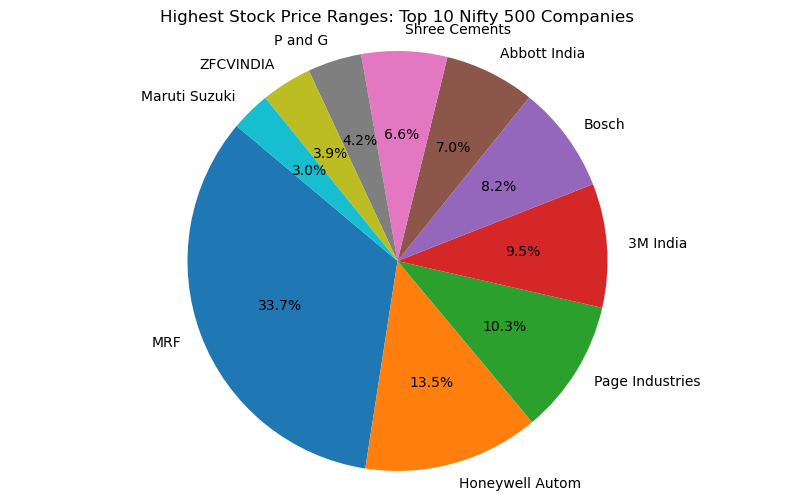

In [222]:
plt.figure(figsize=(10, 6))
plt.pie(top_10_stocks['High'], labels=top_10_stocks['Company Name'], autopct='%1.1f%%', startangle=140)
plt.title('Highest Stock Price Ranges: Top 10 Nifty 500 Companies')
plt.axis('equal') 
plt.savefig('Highest Stock Price Ranges: Top 10 Nifty 500 Companies.jpg')
plt.show()


In [202]:
low_10=df2.nsmallest(10,"Low")[['Company Name','Low']]
low_10

Company Name    Low
33     Vodafone Idea  15.05
34          Yes Bank  23.43
422  Alok Industries  24.80
342          Trident  36.40
379        Easy Trip  39.50
381   TV18 Broadcast  42.50
333    Ujjivan Small  43.02
298     Shree Renuka  45.20
301         UCO Bank  51.40
364       NMDC Steel  53.75

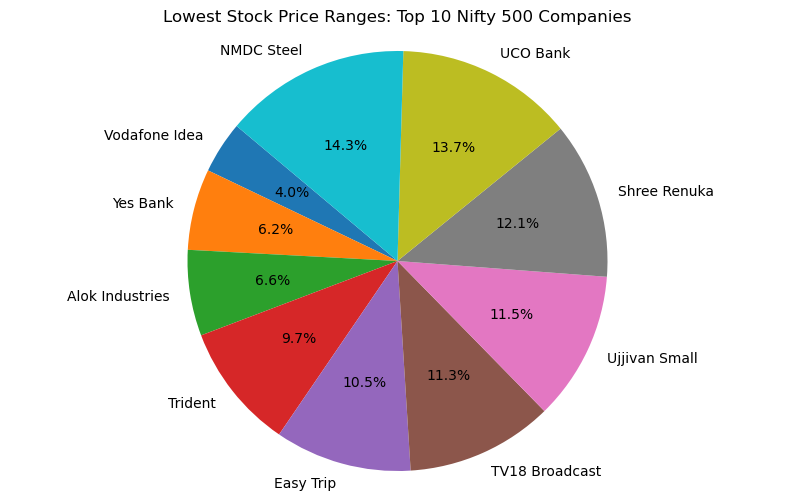

In [221]:
plt.figure(figsize=(10, 6))
plt.pie(low_10['Low'], labels=low_10['Company Name'], autopct='%1.1f%%', startangle=140)
plt.title('Lowest Stock Price Ranges: Top 10 Nifty 500 Companies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Lowest Stock Price Ranges: Top 10 Nifty 500 Companies.jpg')
plt.show()

In [204]:
df2[(df2['High']>100000)&(df2['High']<200000)]

High       Low  Last Price  % Chg  Value (Rs. cr.)  \
244  137900.0  135275.0    136468.6  -1.37            130.7   

     5 day Performances  10 day Performances Company Name  
244              9356.6                608.9          MRF

In [205]:
df2[(df2['Low']>1)&(df2['Low']<20)]

High    Low  Last Price  % Chg  Value (Rs. cr.)  5 day Performances  \
33  15.81  15.05       15.36  -4.71            934.9         386452456.4   

    10 day Performances   Company Name  
33           47290039.7  Vodafone Idea

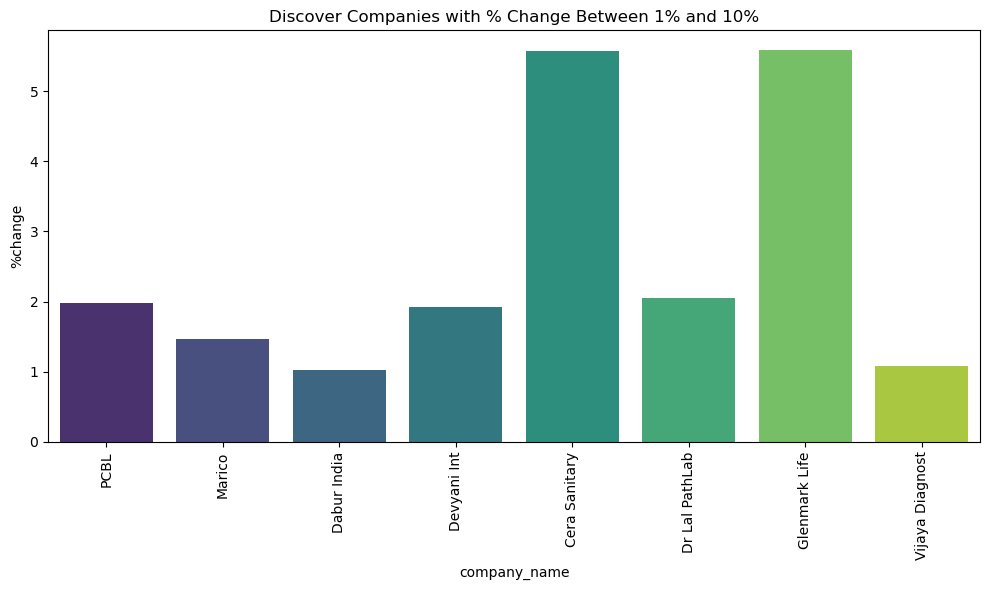

In [220]:
change_over_1_10=df2[(df2['% Chg']>1)&(df2['% Chg']<10)][['Company Name','% Chg']]
change_over_1_10

plt.figure(figsize=(10, 6))
sns.barplot(x='Company Name',y='% Chg', data=change_over_1_10,palette='viridis')
plt.xticks(rotation=90)

plt.title('Discover Companies with % Change Between 1% and 10%')
plt.xlabel('company_name')
plt.ylabel('%change')
plt.tight_layout()
plt.savefig('% Change Between 1% and 10%.jpg') 
plt.show()
 

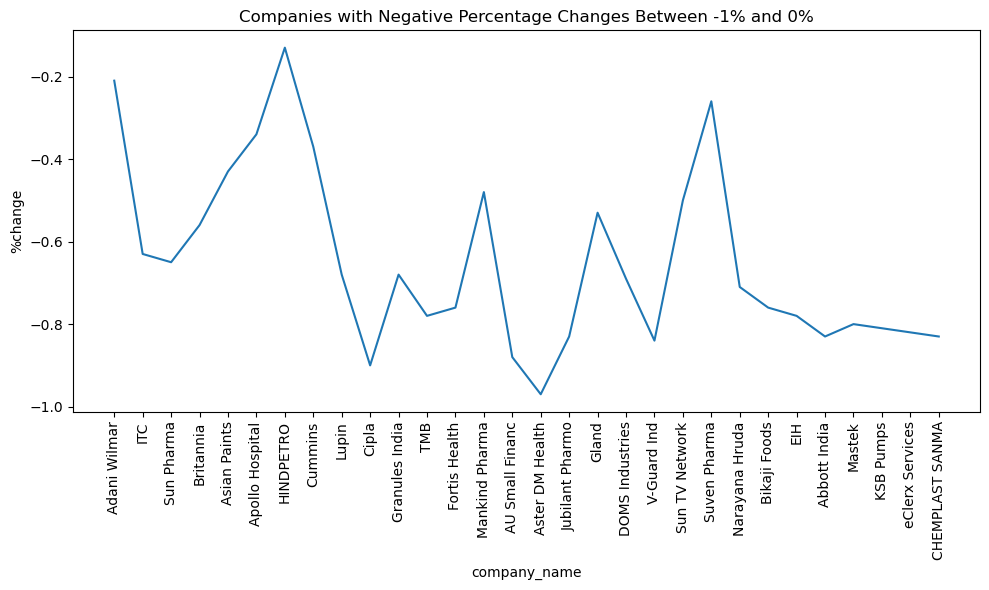

In [219]:
change_over_1_10=df2[(df2['% Chg']<0)&(df2['% Chg']>-1)][['Company Name','% Chg']]
change_over_1_10
plt.figure(figsize=(10,6))
sns.lineplot(x='Company Name',y='% Chg',data=change_over_1_10)
plt.xticks(rotation=90)

plt.title('Companies with Negative Percentage Changes Between -1% and 0%')
plt.xlabel('company_name')
plt.ylabel('%change')
plt.tight_layout()
plt.savefig('% Change Between 1% and 10%.jpg')
plt.show()

In [208]:
df2.sort_values(by="Low",ascending=False).tail(10)

High    Low  Last Price  % Chg  Value (Rs. cr.)  5 day Performances  \
364  55.69  53.75       53.92  -5.42            51.30           5642738.6   
301  54.25  51.40       51.67  -6.36            83.96          12833431.8   
298  47.36  45.20       45.49  -6.48            86.21          27412321.2   
333  44.19  43.02       43.10  -3.75            68.16          15785677.2   
381  44.44  42.50       42.91  -5.86            42.74          19167364.8   
379  40.41  39.50       39.66  -3.01            43.81          22331485.6   
342  37.61  36.40       36.63  -4.14            62.66          40552668.6   
422  25.75  24.80       24.91  -4.89            29.63           9708432.6   
34   24.75  23.43       23.54  -7.50           892.37         314804865.6   
33   15.81  15.05       15.36  -4.71           934.90         386452456.4   

     10 day Performances     Company Name  
364             518142.7       NMDC Steel  
301            1724440.7         UCO Bank  
298            2777145.1     Shree Renuka  
333            1949192.0    Ujjivan Small  
381            1125084.2   TV18 Broadcast  
379            2124987.0        Easy Trip  
342            2071625.3          Trident  
422            2130122.9  Alok Industries  
34            23036450.3         Yes Bank  
33            47290039.7    Vodafone Idea

C:\Users\spriy\AppData\Local\Temp\ipykernel_14612\392196252.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = df2.groupby(by='Company Name')['% Chg','Value (Rs. cr.)'].mean()


                 % Chg  Value (Rs. cr.)
Company Name                           
Zomato           -2.31          4000.85
HDFC Bank        -2.62          3339.24
Tata Motors      -7.31          2708.96
Reliance         -3.47          2467.21
SBI              -4.27          2246.40
Infosys          -3.81          1880.96
NTPC             -1.54          1755.88
ICICI Bank       -2.00          1677.61
Hindustan Aeron  -2.23          1663.19
PCBL              1.98          1642.81


KeyError: 'Value (Rs. cr.)'

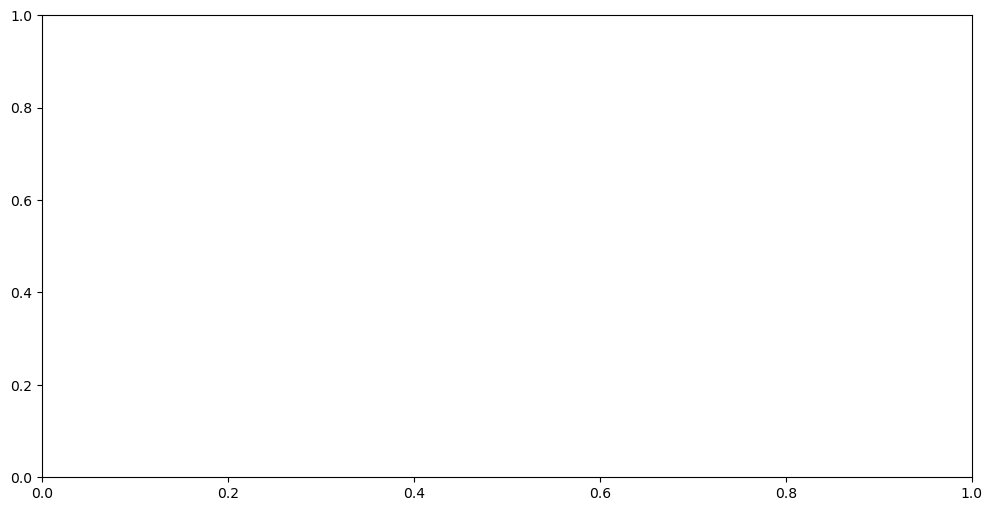

In [209]:
grouped_data = df2.groupby(by='Company Name')['% Chg','Value (Rs. cr.)'].mean()
sorted=grouped_data.sort_values(by='Value (Rs. cr.)',ascending=False).head(10)
print(sorted)

import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for 'Value (Rs. cr.)'
ax1.bar(sorted_data['Company Name'], sorted_data['Value (Rs. cr.)'], color='b', alpha=0.6, label='Value (Rs. cr.)')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('Value (Rs. cr.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line chart for '% Chg'
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(sorted_data['Company Name'], sorted_data['% Chg'], color='r', marker='o', linestyle='-', label='% Chg')
ax2.set_ylabel('% Chg', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and layout
plt.title('Top 10 Companies: Value and % Change')
fig.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()


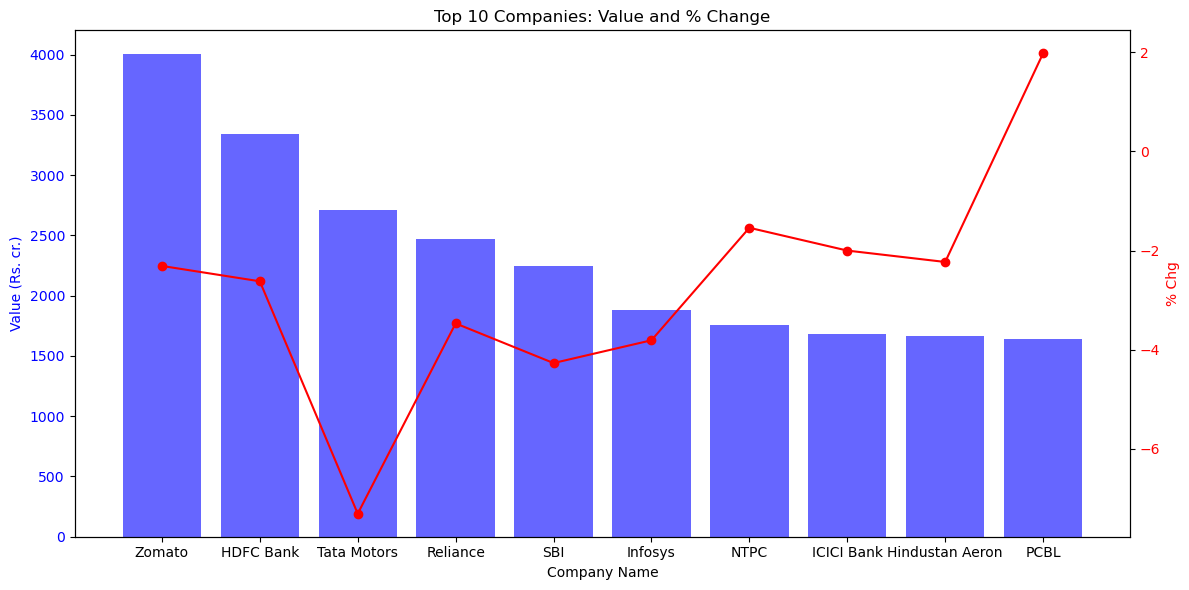

In [218]:

grouped_data = df2.groupby('Company Name')[['% Chg', 'Value (Rs. cr.)']].mean().reset_index()

sorted_data = grouped_data.sort_values(by='Value (Rs. cr.)', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(sorted_data['Company Name'], sorted_data['Value (Rs. cr.)'], color='b', alpha=0.6, label='Value (Rs. cr.)')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('Value (Rs. cr.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sorted_data['Company Name'], sorted_data['% Chg'], color='r', marker='o', linestyle='-', label='% Chg')
ax2.set_ylabel('% Chg', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Top 10 Companies: Value and % Change')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('Top 10 Companies: Value and % Change.jpg')
plt.show()


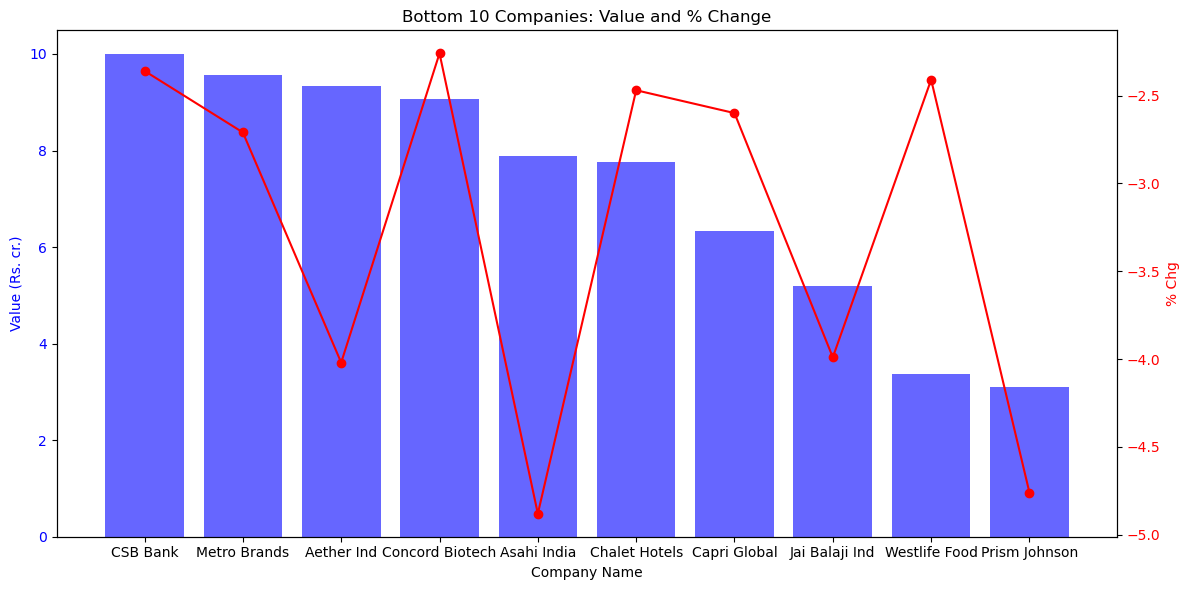

In [215]:
grouped_data = df2.groupby('Company Name')[['% Chg', 'Value (Rs. cr.)']].mean().reset_index()

sorted_data = grouped_data.sort_values(by='Value (Rs. cr.)', ascending=False).tail(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(sorted_data['Company Name'], sorted_data['Value (Rs. cr.)'], color='b', alpha=0.6, label='Value (Rs. cr.)')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('Value (Rs. cr.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sorted_data['Company Name'], sorted_data['% Chg'], color='r', marker='o', linestyle='-', label='% Chg')
ax2.set_ylabel('% Chg', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Bottom 10 Companies: Value and % Change')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('bottom_10_companies_value_and_change.jpg')
plt.show()

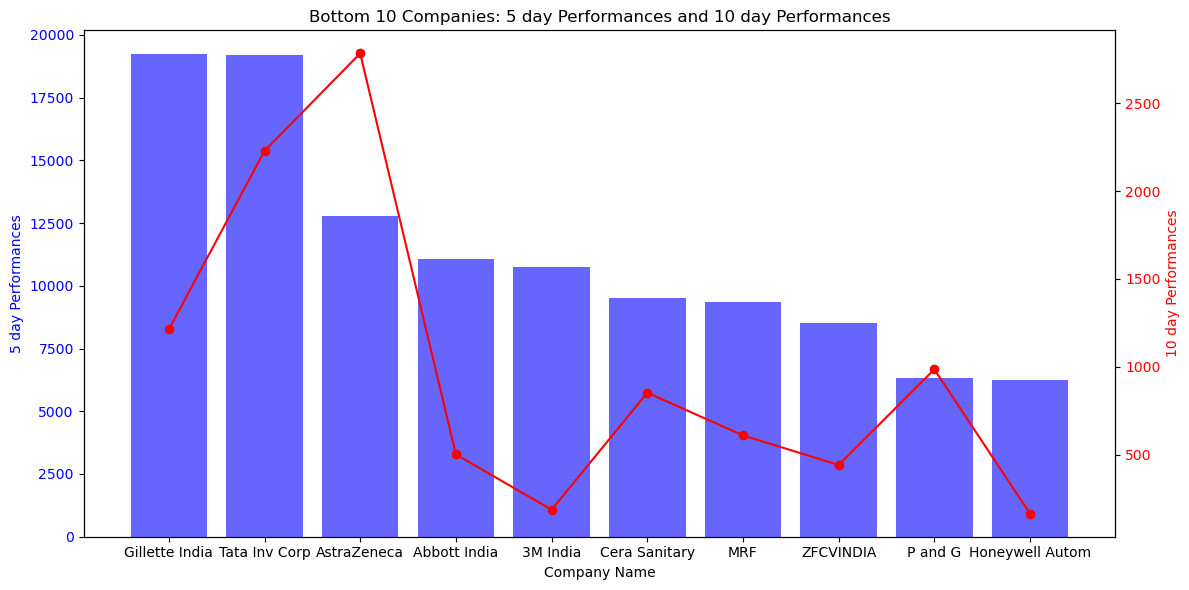

In [217]:
grouped_data = df2.groupby('Company Name')[['5 day Performances', '10 day Performances']].mean().reset_index()

sorted_data = grouped_data.sort_values(by='5 day Performances', ascending=False).tail(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(sorted_data['Company Name'], sorted_data['5 day Performances'], color='b', alpha=0.6, label='Value (Rs. cr.)')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('5 day Performances', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sorted_data['Company Name'], sorted_data['10 day Performances'], color='r', marker='o', linestyle='-', label='% Chg')
ax2.set_ylabel('10 day Performances', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Bottom 10 Companies: 5 day Performances and 10 day Performances')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('Bottom 10 Companies: 5 day Performances and 10 day Performances.jpg')
plt.show()

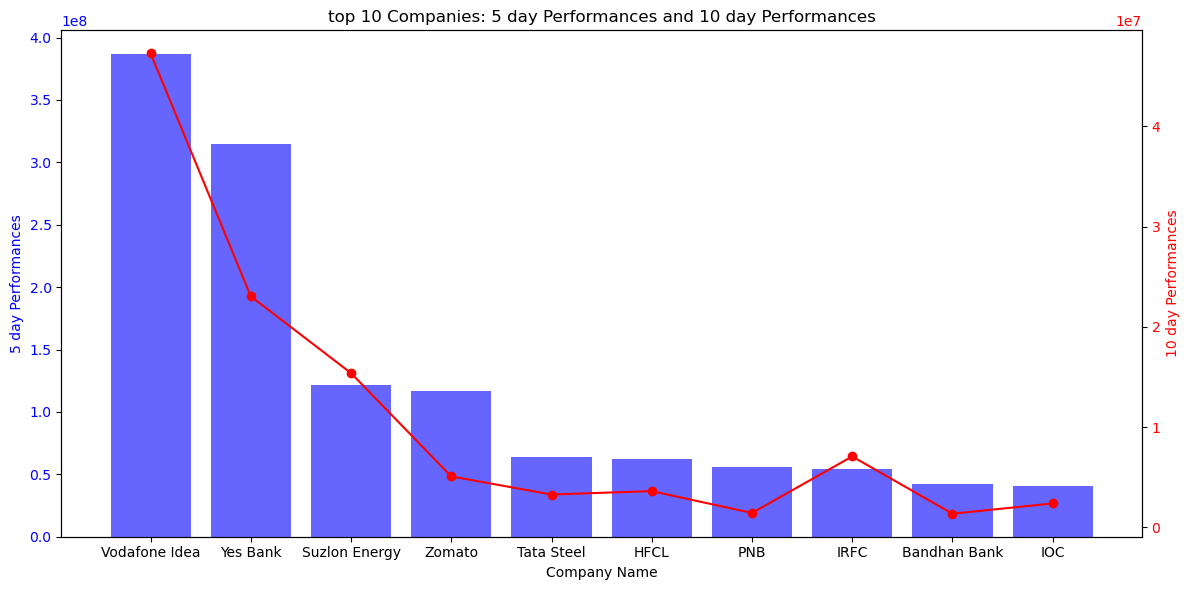

In [216]:
grouped_data = df2.groupby('Company Name')[['5 day Performances', '10 day Performances']].mean().reset_index()

sorted_data = grouped_data.sort_values(by='5 day Performances', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(sorted_data['Company Name'], sorted_data['5 day Performances'], color='b', alpha=0.6, label='Value (Rs. cr.)')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('5 day Performances', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sorted_data['Company Name'], sorted_data['10 day Performances'], color='r', marker='o', linestyle='-', label='% Chg')
ax2.set_ylabel('10 day Performances', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('top 10 Companies: 5 day Performances and 10 day Performances')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('top 10 Companies: 5 day Performances and 10 day Performances.jpg')
plt.show()

Company Name  5 day Performances  10 day Performances
485  Vodafone Idea         386452456.4           47290039.7
492       Yes Bank         314804865.6           23036450.3
432  Suzlon Energy         121967377.6           15374188.2
496         Zomato         116396444.2            5067690.9
451     Tata Steel          63623645.0            3263912.1
201           HFCL          62037630.8            3604637.4
353            PNB          55566902.4            1420830.5
233           IRFC          54366737.8            7063344.7
63    Bandhan Bank          42178605.6            1348553.0
230            IOC          40948051.2            2371629.9